## Review

Hi Gaini. This is Soslan. I reviewed one of your projects. I've added all my comments to new cells with different coloring.

<div class="alert alert-success" role="alert">
  If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
  If the topic requires some extra work so I can accept it then the color will be red
</div>

Your project is of good quality. All the checkpoints were done almost correctly. But you made a funny mistake in hypothesis testing while splitting the data by weather conditions. Just have a look :)

---

Everything is correct now. So I'm accepting your project. Good luck with future learning.

---

### Step 4. Exploratory data analysis

In [1]:
import pandas as pd

sql_01 = pd.read_csv('/datasets/project_sql_result_01.csv')
sql_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [2]:
sql_01

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [3]:
sql_02 = pd.read_csv('/datasets/project_sql_result_04.csv')
sql_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [4]:
top10_neighborhoods = sql_02.sort_values(by='average_trips', ascending=False).loc[0:9]
top10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


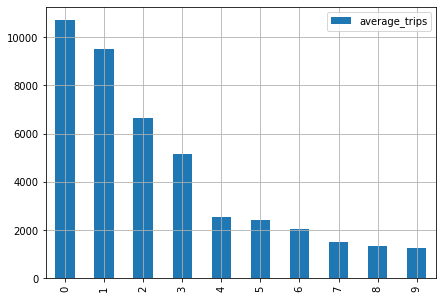

In [5]:
top10_neighborhoods.plot(kind='bar', figsize=(7,5), grid=True)


<div class="alert alert-warning" role="alert">
Correct chart, but adding index will make it more informative. Here an example.</div>

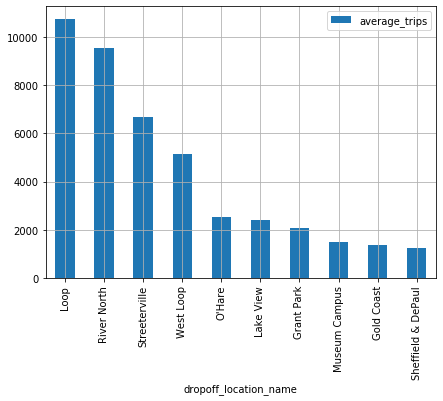

In [6]:
#reviewer's code

top10_neighborhoods.set_index('dropoff_location_name', inplace=True)
top10_neighborhoods.plot(kind='bar', figsize=(7,5), grid=True)

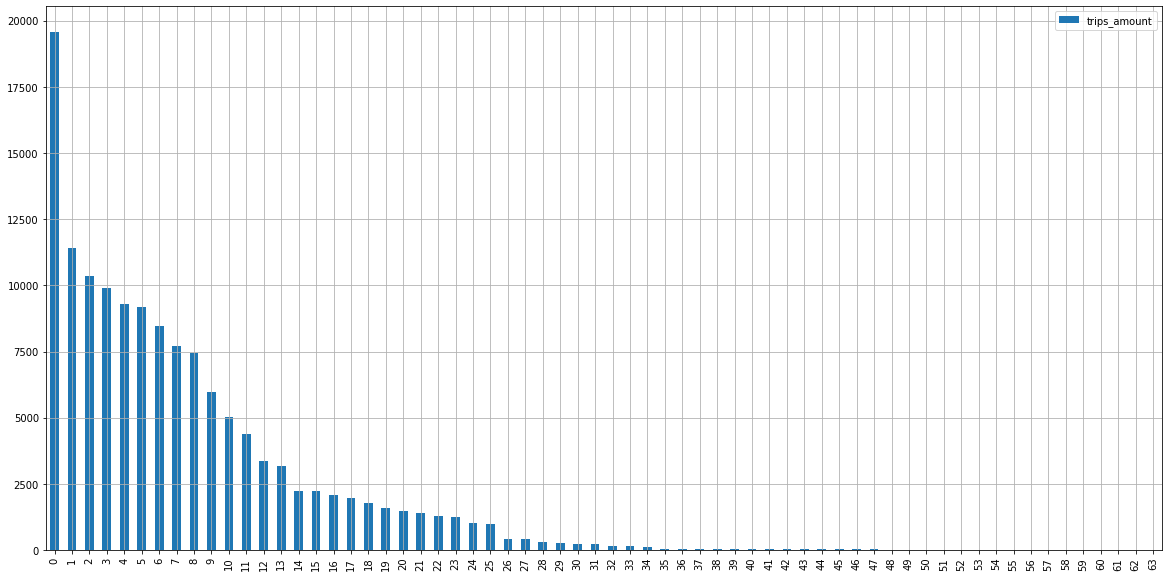

In [7]:
sql_01.plot(kind='bar', figsize=(20,10), grid=True)

The datatypes of the datasets are correct. Above are the plots of top 10 popular drop off neighborhoods and average trips for each company for November. As seen from the first graph the most popular drop off place is Loop with more than 10000 trips, the popularity of other top places gradually declines to Sheffield & DePaul being a destination for only 1259 trips. The second graph shows that the absolute leaders among taxi companies is Flash cab with almost 20000 trips per month. Taxi Affiliation Services had twice as less trips than Flash Cab, the number of trips then steadily decreases. More than a half of the companies had less than 2000 trips for November. 

<div class="alert alert-success" role="alert">
Overall correct step.</div>

### Step 5. Hypothesis testing

H0 - The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.
H1 - The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

In [8]:
sql_07 = pd.read_csv('/datasets/project_sql_result_07.csv')
sql_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [9]:
from scipy import stats as st

rainy_sat = sql_07.query('weather_conditions=="Bad"')
sunny_sat = sql_07.query('weather_conditions!="Bad"')

alpha=0.05

results = st.ttest_ind(rainy_sat.duration_seconds, sunny_sat.duration_seconds,equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  6.738994326108734e-12
We reject the null hypothesis


The p-value is substantially larger than the significance level hence the means of two distributions are not different and we cannot reject the null hypithesis.

<div class="alert alert-danger" role="alert">
<s>You have the same data in `rainy_sat` and `sunny_sat` because weather conditions are bad (== 'Bad') means that they are not good (!='Good') :) That is why your p-value is equal to 1. Your data coincide.</s>
</div>

<div class="alert alert-success" role="alert">
Fixed.</div>

In [10]:
# reviewer's code

rainy_sat == sunny_sat

ValueError: Can only compare identically-labeled DataFrame objects